# Capstone Project: Amazon Review Classification (Part 3)
Author: **Steven Lee**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Word-Count-Frequency-Distribution" data-toc-modified-id="Word-Count-Frequency-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word Count Frequency Distribution</a></span></li><li><span><a href="#Topical-Word-Count-Frequency-Distribution" data-toc-modified-id="Topical-Word-Count-Frequency-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Topical Word Count Frequency Distribution</a></span></li><li><span><a href="#Document-Count-Frequency-Distribution" data-toc-modified-id="Document-Count-Frequency-Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Document Count Frequency Distribution</a></span></li><li><span><a href="#Top-10-Topical-Keywords" data-toc-modified-id="Top-10-Topical-Keywords-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Top 10 Topical Keywords</a></span></li><li><span><a href="#Topical-Top-3-Documents" data-toc-modified-id="Topical-Top-3-Documents-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Topical Top 3 Documents</a></span></li></ul></div>

## Import Libraries

In [74]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Set pandas display options.
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 150)

# Set Seaborn plot (default) to display grid over white background.
sns.set_style('whitegrid')

# Enable plots with higher resolution.
%config InlineBackend.figure_format = 'retina'

# Set output of plots to display inline directly below the code cell that produced it.
%matplotlib inline

## Prepare Data

In [2]:
# Read in clean reviews dataset.
reviews = pd.read_csv("../data/reviews_lda.csv")
reviews.shape

(1477655, 9)

In [3]:
reviews.head(3)

,dmnt_topic,pct_contrib,reviewText,main_cat,category,brand,document,word_cnt,overall
0,21,0.7583,"returned, decided against this product",Tools & Home Improvement,27,SioGreen,returned decided product,5,5.0
1,22,0.3799,Awesome heater for the electrical requirements! Makes an awesome preheater for my talnkless system,Tools & Home Improvement,27,SioGreen,awesome heater electrical requirement make awesome preheater talnkless system,14,5.0
2,13,0.8389,Keeps the mist of your wood trim and on you. Bendable too.,Tools & Home Improvement,27,SioGreen,keep mist wood trim bendable,12,5.0


## Word Count Frequency Distribution

In [4]:
word_cnt = reviews['word_cnt']
print(word_cnt.value_counts())

5      60959
6      57546
7      50263
8      46412
9      42082
       ...  
126     2196
125     2192
124     2166
127     2066
128     2061
Name: word_cnt, Length: 124, dtype: int64


In [5]:
word_cnt.describe()

count    1.477655e+06
mean     3.573487e+01
std      2.944650e+01
min      5.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      5.000000e+01
max      1.280000e+02
Name: word_cnt, dtype: float64

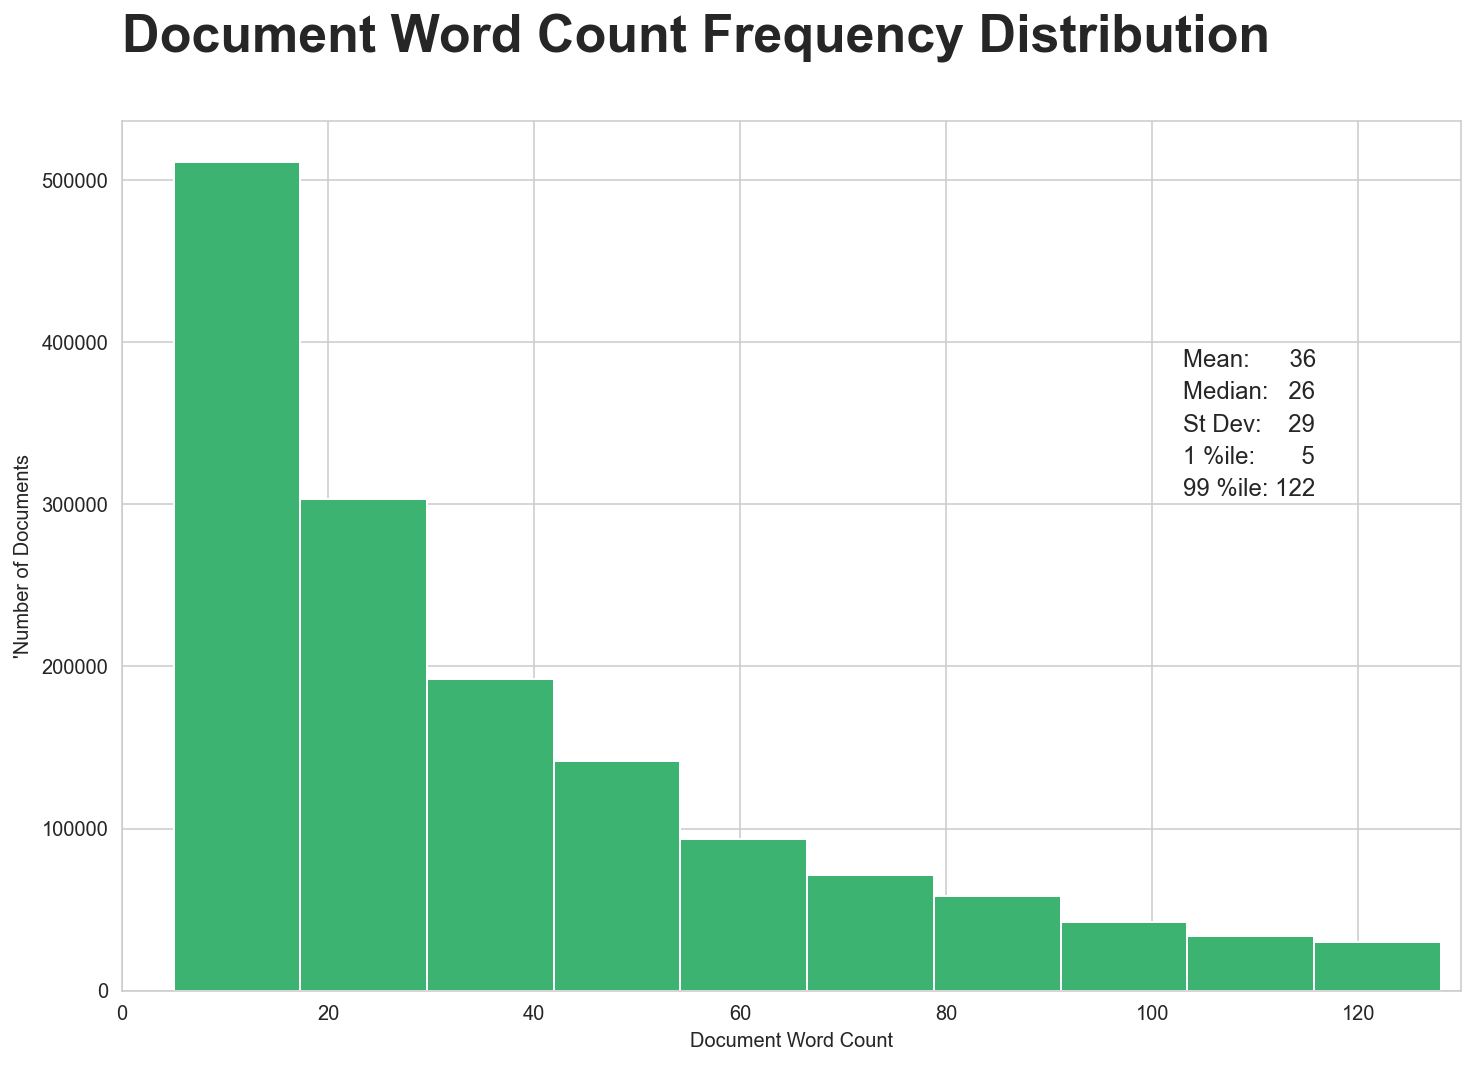

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(word_cnt, bins=10, color='mediumseagreen')
plt.xlim(0, 130)
plt.xlabel("Document Word Count")
plt.ylabel("Number of Documents")
plt.title("Document Word Count Frequency Distribution\n", fontsize=26, fontweight='bold', position=(0, 1), ha='left')

plt.text(103, 385000, "Mean:      " + str(round(np.mean(word_cnt))), fontsize=12)
plt.text(103, 365000, "Median:   " + str(round(np.median(word_cnt))), fontsize=12)
plt.text(103, 345000, "St Dev:    " + str(round(np.std(word_cnt))), fontsize=12)
plt.text(103, 325000, "1 %ile:       " + str(round(np.quantile(word_cnt, q=0.01))), fontsize=12)
plt.text(103, 305000, "99 %ile: " + str(round(np.quantile(word_cnt, q=0.99))), fontsize=12);

## Topical Word Count Frequency Distribution

In [7]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]    # More colors: 'mcolors.XKCD_COLORS'

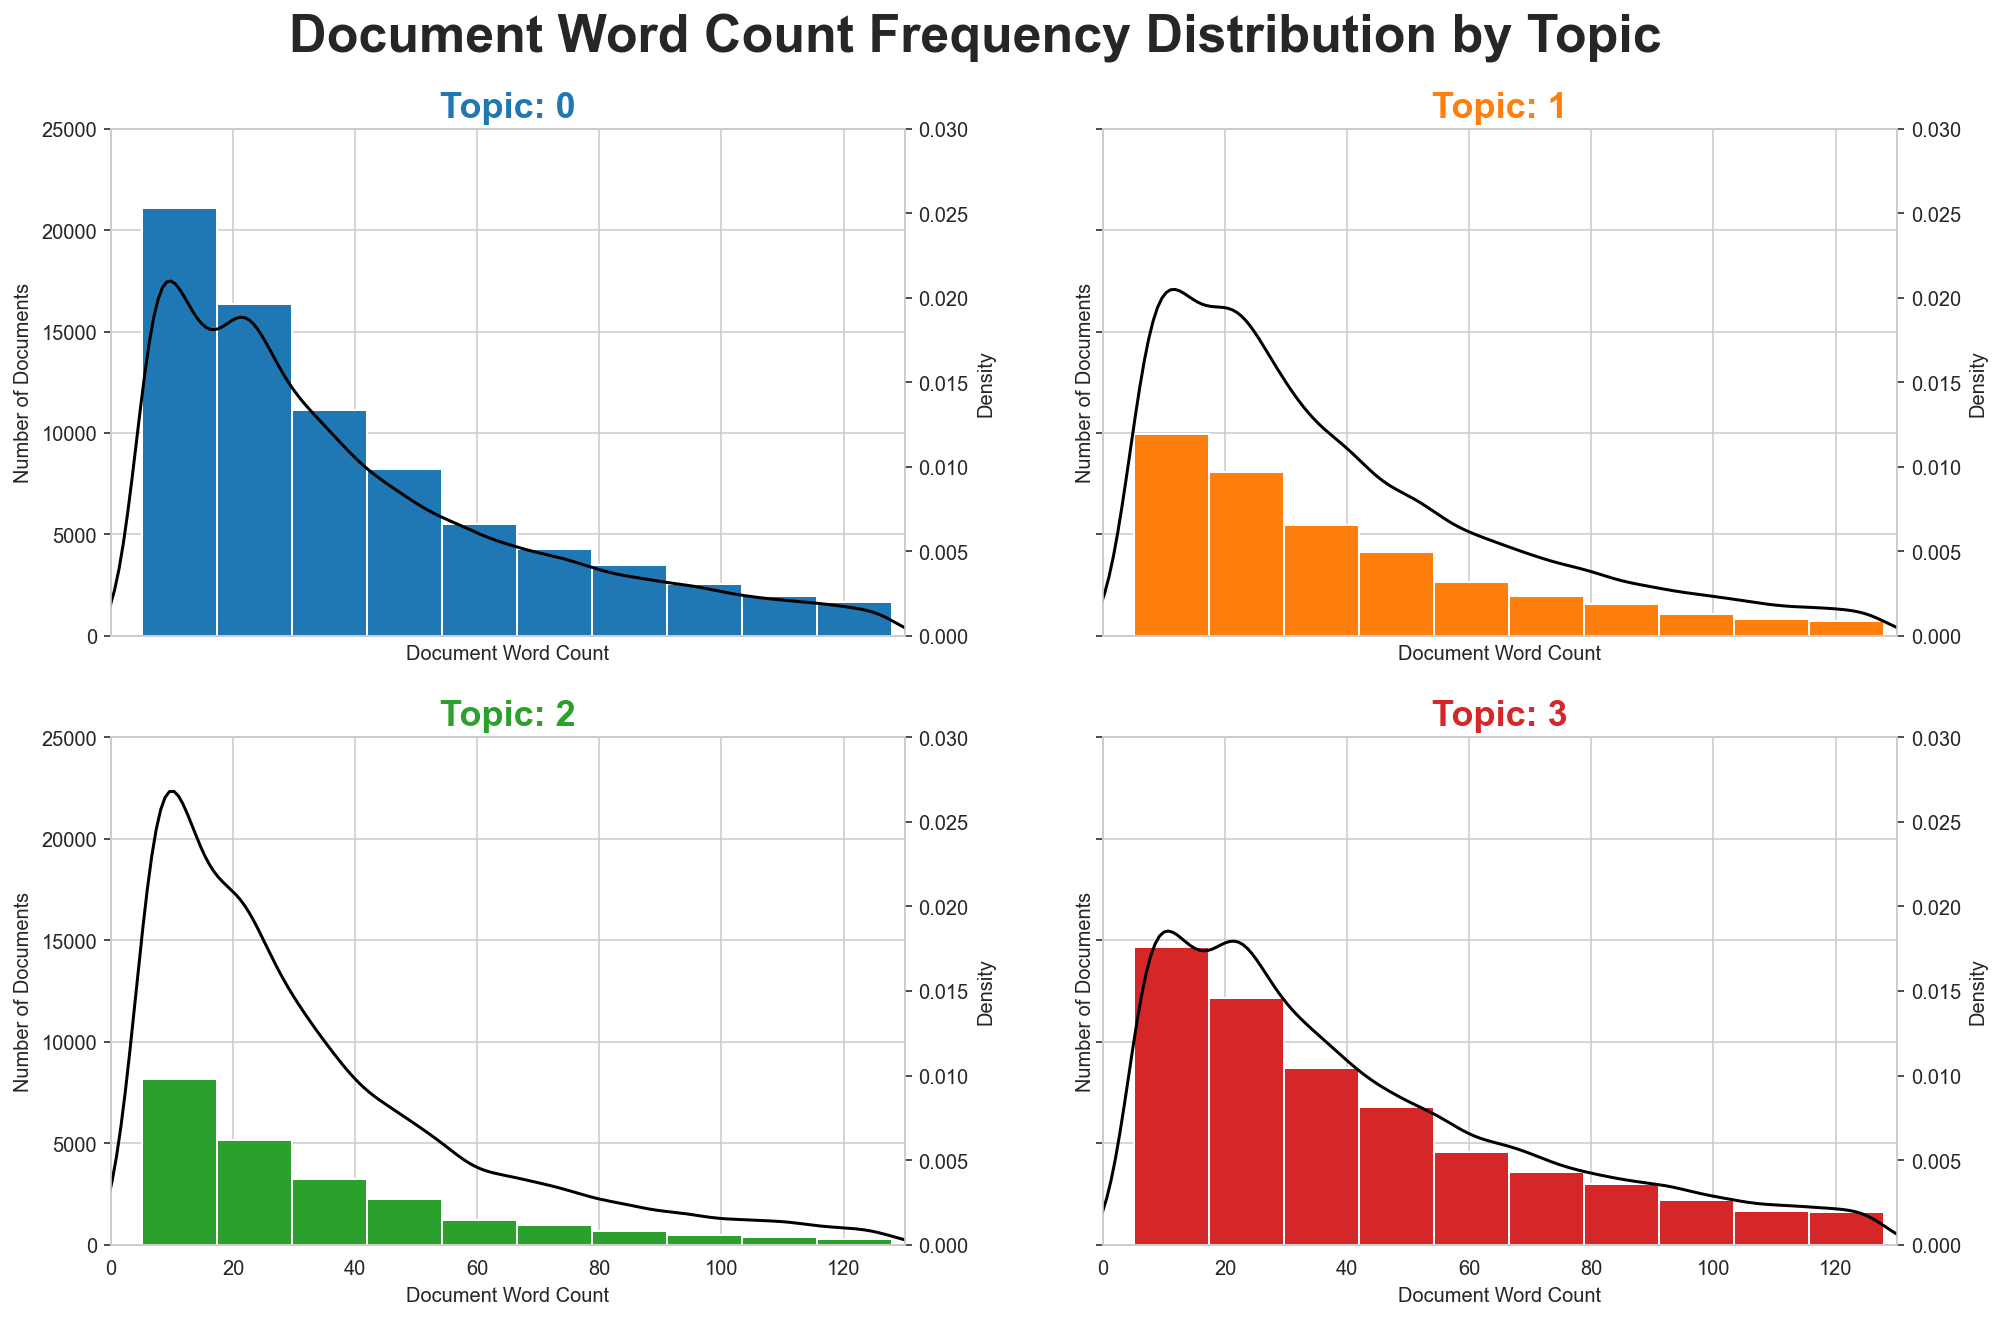

In [58]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
fig.subplots_adjust(top=0.9, hspace=0.2, wspace=0.25)
fig.suptitle("Document Word Count Frequency Distribution by Topic\n", fontsize=26, fontweight='bold');

for i, ax in enumerate(axes.flatten()):
    word_cnt = reviews.loc[reviews['dmnt_topic'] == i, 'word_cnt']
    ax.hist(word_cnt, bins=10, color=cols[i])
    ax2 = ax.twinx()
    ax2.set_ylim(0, 0.03)
    ax2.grid(False)
    sns.kdeplot(word_cnt, color='black', shade=False, ax=ax2)
    ax.set(xlim=(0, 130), xlabel="Document Word Count")
    ax.set(ylim=(0, 25000), ylabel="Number of Documents")
    ax.set_title("Topic: " + str(i), fontsize=18, fontweight='bold', color=cols[i])

## Document Count Frequency Distribution

In [10]:
dmnt_topic = topics['Dmnt_Topic']
doc_cnt = topics['Total_Docs']

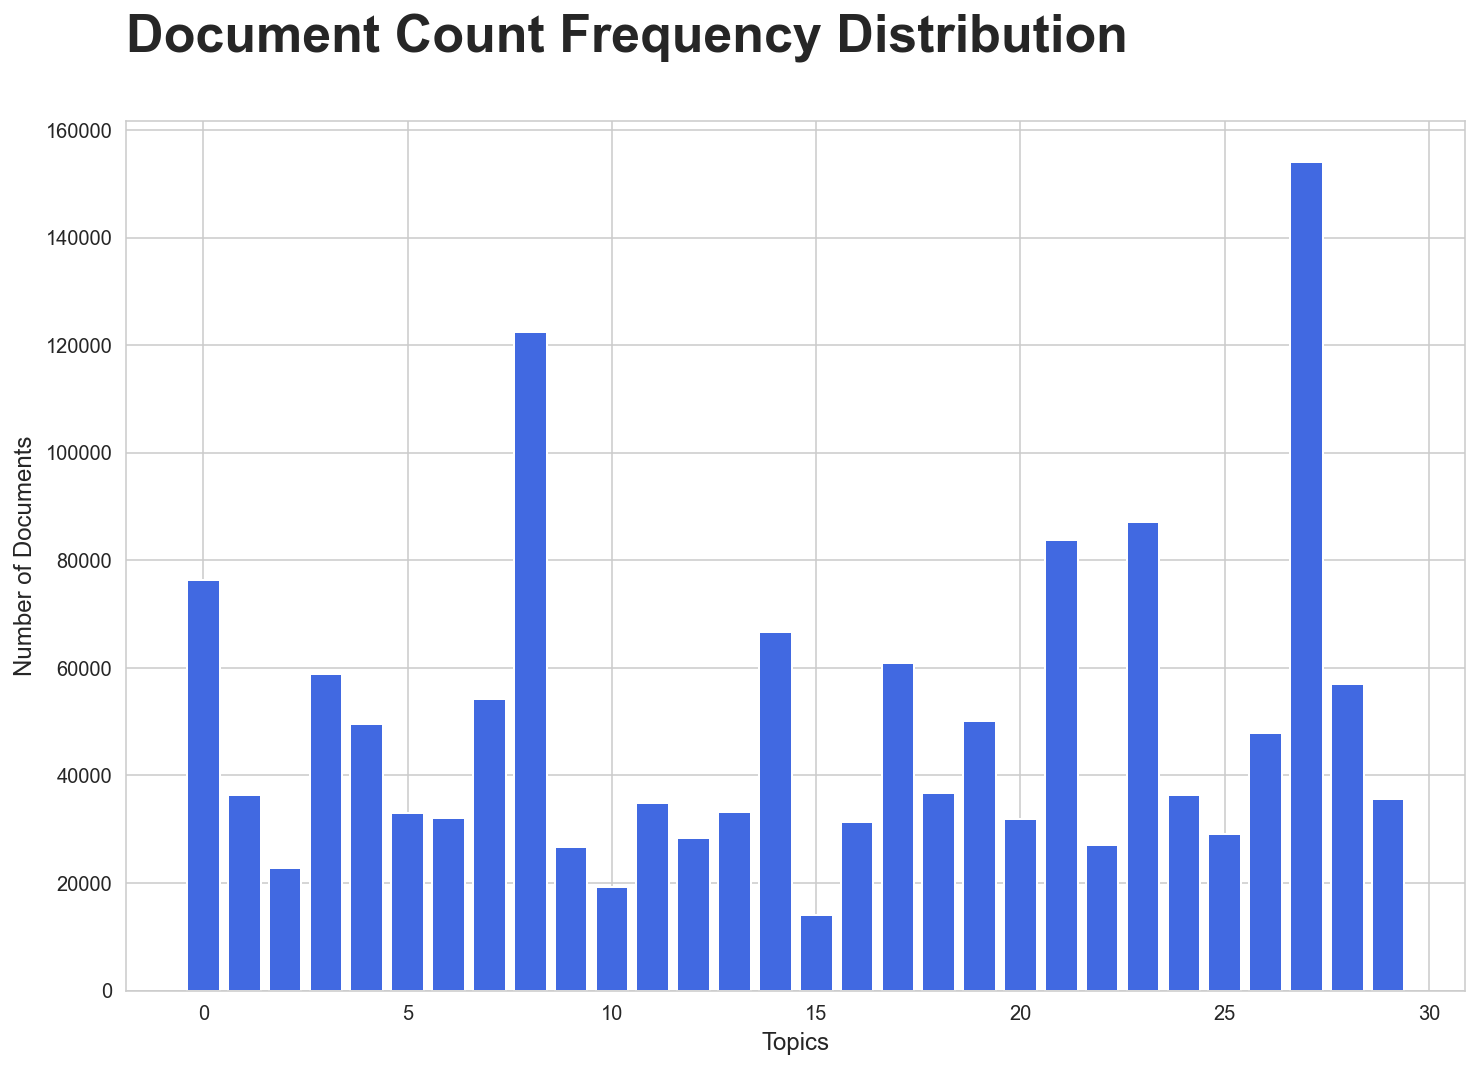

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.bar(dmnt_topic, doc_cnt, color='royalblue')
plt.ylim=(0, 170000)
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.title("Document Count Frequency Distribution\n", fontsize=26, fontweight='bold', position=(0, 1), ha='left');

## Top 10 Topical Keywords

In [9]:
# Read in topics dataset.
topics = pd.read_csv("../data/topics_lda.csv")
topics[:10]

,Dmnt_Topic,Keywords,Total_Docs,Pct_Docs
0,0,"tool, small, screw, size, great, wrench, nice, bit, tight, driver",76336,0.0517
1,1,"cord, power, outlet, plug, would, little, need, socket, extension, wish",36442,0.0247
2,2,"floor, amazing, get, great, quiet, tile, clean, done, used, work",22794,0.0154
3,3,"knife, pocket, sharp, blade, carry, clip, tool, little, great, small",58795,0.0398
4,4,"light, lamp, room, night, cool, bright, really, like, work, love",49509,0.0335
5,5,"love, bought, house, gift, awesome, around, christmas, loved, hook, husband",33030,0.0224
6,6,"glove, hose, hand, good, wear, large, pair, drawer, window, work",32129,0.0217
7,7,"heavy, like, duty, hold, feel, magnet, solid, good, weight, strong",54134,0.0366
8,8,"light, battery, bright, flashlight, night, great, work, charge, time, switch",122487,0.0829
9,9,"color, look, white, nice, like, great, picture, black, blue, looking",26681,0.0181


In [77]:
# Read in keywords dataset.
keywords = pd.read_csv("../data/keywords_lda.csv")
keywords.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

,T00-KW,T00-WT,T01-KW,T01-WT,T02-KW,T02-WT,T03-KW,T03-WT,T04-KW,T04-WT
0,tool,0.061721,cord,0.035566,floor,0.020215,knife,0.055884,light,0.043749
1,small,0.019680,power,0.030405,amazing,0.018408,pocket,0.025732,lamp,0.031599
2,screw,0.017672,outlet,0.028765,get,0.016846,sharp,0.023925,room,0.024153
3,size,0.015947,plug,0.027535,great,0.014905,blade,0.018434,night,0.014707
4,great,0.014948,would,0.017954,quiet,0.013251,carry,0.017877,cool,0.014327
5,wrench,0.014925,little,0.017097,tile,0.012680,clip,0.017620,bright,0.014224
6,nice,0.013884,need,0.016968,clean,0.012182,tool,0.016920,really,0.013736
7,bit,0.013803,socket,0.016856,done,0.011842,little,0.015310,like,0.011796
8,tight,0.013188,extension,0.015203,used,0.011433,great,0.015197,work,0.010670
9,driver,0.013144,wish,0.012467,work,0.011362,small,0.013822,love,0.009980


## Topical Top 3 Documents

In [81]:
# Read in top 3 documents dataset.
top3docs = pd.read_csv("../data/top3docs.csv")
top3docs.loc[:11, ['dmnt_topic', 'pct_contrib', 'reviewText']]

,dmnt_topic,pct_contrib,reviewText
0,0,0.9628,Nice sets of wrenches but I have an issue with the Standard set holder. The markings on the holder to identify the sizes do not line up with the a...
1,0,0.9628,"This lugnut kit is well made and comes in a nice solid case. It is quality made in Taiwan, not China. The 1/2"" square drive shaft snaps into the m..."
2,0,0.9613,"Very nice to have with the impact wrench, those things are wonderful. A tool set is not complete without an impact wrench and the tools to go with..."
3,1,0.9830,NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO POWER ADAPTER! NO...
4,1,0.9688,"Just right for getting some cumbersome AC adaptors off the plug strip, opening sockets for more plugs to be used. Also, when not used simply to g..."
5,1,0.9667,"Larger than I expected, but I understand why: plenty of room for plug mounted adapters. The only thing I wish is that it would split the 6 socket..."
6,2,0.9578,"Big bit used with Bosch 1617EVS 2 1/4 hp. Use it on Tigerwood, Brazillian Cherry, and VG Fir with no issues. I took two passes on the expensive ..."
7,2,0.9463,"Powerful and has all the attachments I need in a wood shop. Floor attachment makes my shop now always clean in minutes, not 30-40 minutes. Love ..."
8,2,0.9395,I've used this for cleaning mortar and knocking the lips off retaining wall blocks. Works great. Easily sharpens on my bench grinder.
9,3,0.9731,This is a nice little knife and I do mean little. It's a lot smaller than I thought but I'm still pretty happy. I have a larger identical one that...
